In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel("online_retail_II.xlsx")
df



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [2]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


(525461, 8)

In [3]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

In [6]:
df["Invoice"].nunique()

28816

In [7]:
# Check how many invoices are cancellations
canceled_orders = df[df['Invoice'].astype(str).str.startswith('C')]
print("Number of canceled orders:", len(canceled_orders))


Number of canceled orders: 10182


In [8]:
# Keep only non-canceled orders
df = df[~df['Invoice'].astype(str).str.startswith('C')]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508414 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      508414 non-null  object        
 1   StockCode    508414 non-null  object        
 2   Description  505486 non-null  object        
 3   Quantity     508414 non-null  int64         
 4   InvoiceDate  508414 non-null  datetime64[ns]
 5   Price        508414 non-null  float64       
 6   Customer ID  400947 non-null  float64       
 7   Country      508414 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.9+ MB


In [10]:
#Dropping Rows where Customer id and description is missing
# they both share the same rows where values are missing

df = df.dropna(subset=["Customer ID"])


In [11]:
df["Customer ID"].isnull().sum()

0

In [12]:
df["Description"].isnull().sum()

0

In [13]:
df[['Quantity', 'Price']].describe()

,Quantity,Price
count,400947.000000,400947.000000
mean,13.768523,3.305571
std,97.639816,35.046376
min,1.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,19152.000000,10953.500000


In [14]:
df = df[df["Quantity"] >0]
df = df[df["Price"] >0]



In [15]:
# Define caps using 99th percentile
q_cap = df['Quantity'].quantile(0.99)
p_cap = df['Price'].quantile(0.99)

# Cap values
df['Quantity'] = df['Quantity'].clip(upper=q_cap)
df['Price'] = df['Price'].clip(upper=p_cap)


In [16]:
df[['Quantity', 'Price']].describe()

,Quantity,Price
count,400916.000000,400916.000000
mean,11.035147,2.944171
std,19.880702,2.809726
min,1.000000,0.001000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,144.000000,14.950000


In [17]:
# coverting invoicedate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400916 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400916 non-null  object        
 1   StockCode    400916 non-null  object        
 2   Description  400916 non-null  object        
 3   Quantity     400916 non-null  int64         
 4   InvoiceDate  400916 non-null  datetime64[ns]
 5   Price        400916 non-null  float64       
 6   Customer ID  400916 non-null  float64       
 7   Country      400916 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.5+ MB


In [19]:
# how may unique products are there since we have no products column so we will do with description
print(df["Description"].nunique())
df["Description"].unique()

4444


array(['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS',
       ' WHITE CHERRY LIGHTS', ..., 'BAKING MOULD ROSE MILK CHOCOLATE',
       'BAKING MOULD CHOCOLATE CUP CAKES',
       'BAKING MOULD EASTER EGG MILK CHOC'], dtype=object)

In [20]:
# Total number of transactions
total_transactions = df['Invoice'].nunique()
print("Total number of transactions:", total_transactions)


Total number of transactions: 19213


In [21]:
# Count unique customers
unique_cust = df['Customer ID'].nunique()
print("Total Unique Customers:", unique_cust)

Total Unique Customers: 4312


In [22]:
# countries by most customer ID
countries_by_most_customer_ID = df.groupby("Country")["Customer ID"].nunique().reset_index().sort_values(by="Customer ID", ascending=False).head()
countries_by_most_customer_ID

,Country,Customer ID
34,United Kingdom,3969
12,Germany,67
11,France,47
28,Spain,25
21,Netherlands,22


<Axes: xlabel='Country', ylabel='Customer ID'>

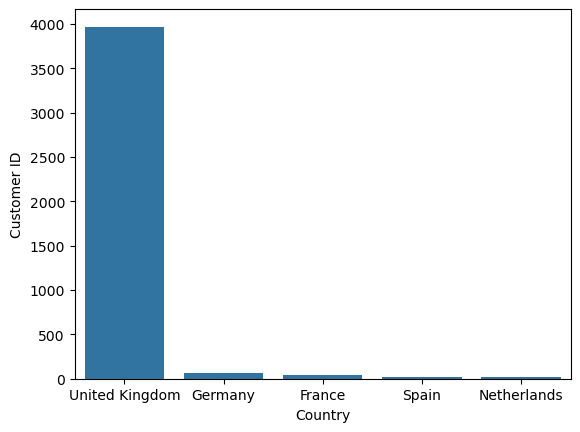

In [23]:
# Top 5 countries with most customers
sns.barplot(countries_by_most_customer_ID,x = "Country", y = "Customer ID")

In [24]:
# Top 10 selling products by quantity
top_products = (df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10))

print("Top 10 Selling Products by Quantity:",top_products)

Top 10 Selling Products by Quantity:                            Description  Quantity
0   WHITE HANGING HEART T-LIGHT HOLDER     49108
1     PACK OF 72 RETRO SPOT CAKE CASES     37401
2        ASSORTED COLOUR BIRD ORNAMENT     34922
3          60 TEATIME FAIRY CAKE CASES     29656
4    WORLD WAR 2 GLIDERS ASSTD DESIGNS     29362
5              JUMBO BAG RED RETROSPOT     25603
6       STRAWBERRY CERAMIC TRINKET BOX     24682
7   PACK OF 60 PINK PAISLEY CAKE CASES     24511
8  COLOUR GLASS T-LIGHT HOLDER HANGING     19048
9         ASSTD DESIGN BUBBLE GUM RING     18384


In [25]:
df["Revenue"] = df["Price"] * df["Quantity"]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [26]:
# Top 10 selling products by quantity
revenue_by_products = (df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).reset_index().head(10))

print("Top 10 Selling Products by Quantity:",revenue_by_products)

Top 10 Selling Products by Quantity:                           Description    Revenue
0            REGENCY CAKESTAND 3 TIER  137858.40
1  WHITE HANGING HEART T-LIGHT HOLDER  131774.86
2       ASSORTED COLOUR BIRD ORNAMENT   56205.38
3             JUMBO BAG RED RETROSPOT   45166.05
4                       PARTY BUNTING   34949.80
5                             POSTAGE   32734.85
6          VINTAGE UNION JACK BUNTING   31409.28
7     PAPER CHAIN KIT 50'S CHRISTMAS    31169.75
8                JUMBO BAG STRAWBERRY   29583.45
9           EDWARDIAN PARASOL NATURAL   29465.55


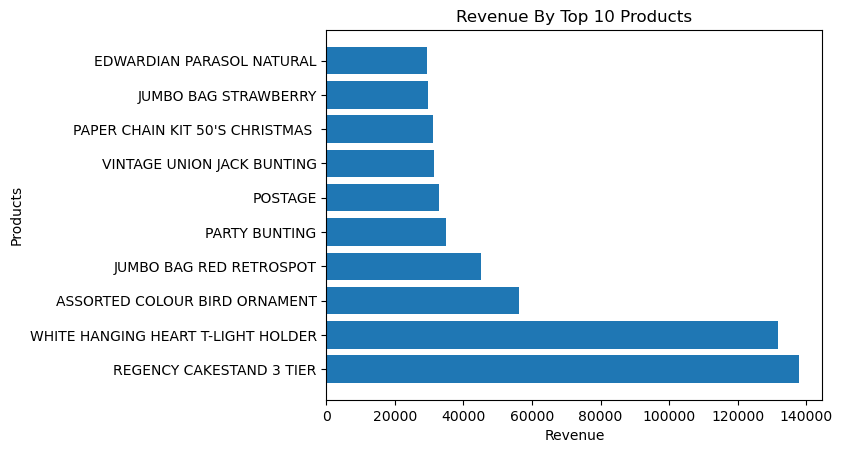

In [97]:
plt.barh(y = "Description",data=revenue_by_products,width="Revenue",)
plt.title("Revenue By Top 10 Products")
plt.xlabel("Revenue")
plt.ylabel("Products")
plt.show()

In [98]:
#checking for products where unit price is 0 or negative
df_pr = df[df["Price"]<=0] [["Description","Price"]]
df_pr

,Description,Price


In [99]:
# customer who bought the most products
customer_by_products = (df.groupby('Customer ID')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10))

customer_by_products

,Customer ID,Quantity
0,14646.0,129106
1,13694.0,87519
2,14156.0,75771
3,14911.0,68701
4,18102.0,66999
5,17511.0,52745
6,15061.0,42715
7,14298.0,38681
8,16684.0,32265
9,15311.0,30606


<Figure size 1000x1000 with 0 Axes>

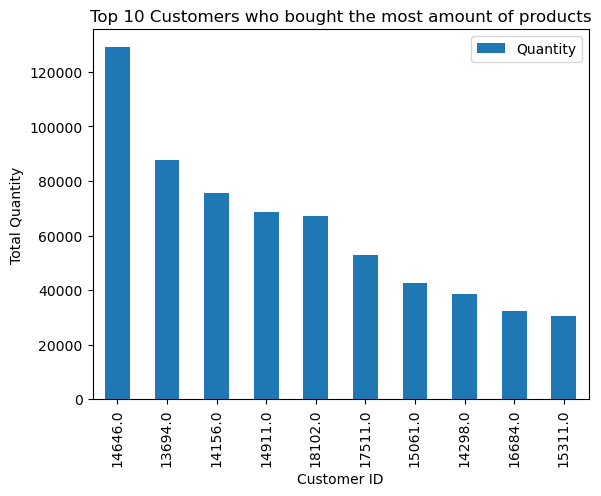

In [100]:
plt.figure(figsize=(10,10))
customer_by_products.plot(kind="bar",x="Customer ID",y="Quantity",)
plt.title("Top 10 Customers who bought the most amount of products")
plt.xlabel("Customer ID")
plt.ylabel("Total Quantity")
plt.show()

In [101]:
puchases_by_customer = df.groupby("Customer ID")["Quantity"].sum()
puchases_by_customer

Customer ID
12346.0      70
12347.0     828
12348.0     373
12349.0     993
12351.0     261
           ... 
18283.0     322
18284.0     494
18285.0     145
18286.0     608
18287.0    1427
Name: Quantity, Length: 4312, dtype: int64

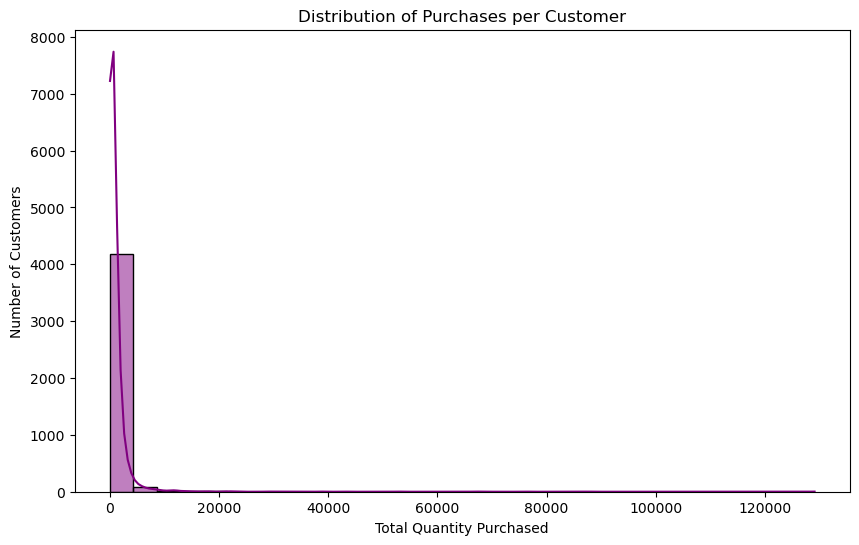

In [102]:
plt.figure(figsize=(10,6))
sns.histplot(puchases_by_customer, bins=30, kde=True, color="purple")
plt.title("Distribution of Purchases per Customer")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Number of Customers")
plt.show()

In [103]:
loyal_customer = df.groupby("Customer ID")["Invoice"].nunique().sort_values(ascending=False).head(10)
loyal_customer

Customer ID
14911.0    205
17850.0    155
12748.0    144
15311.0    121
13089.0    109
14606.0    102
14156.0    102
13694.0     94
17841.0     91
18102.0     89
Name: Invoice, dtype: int64

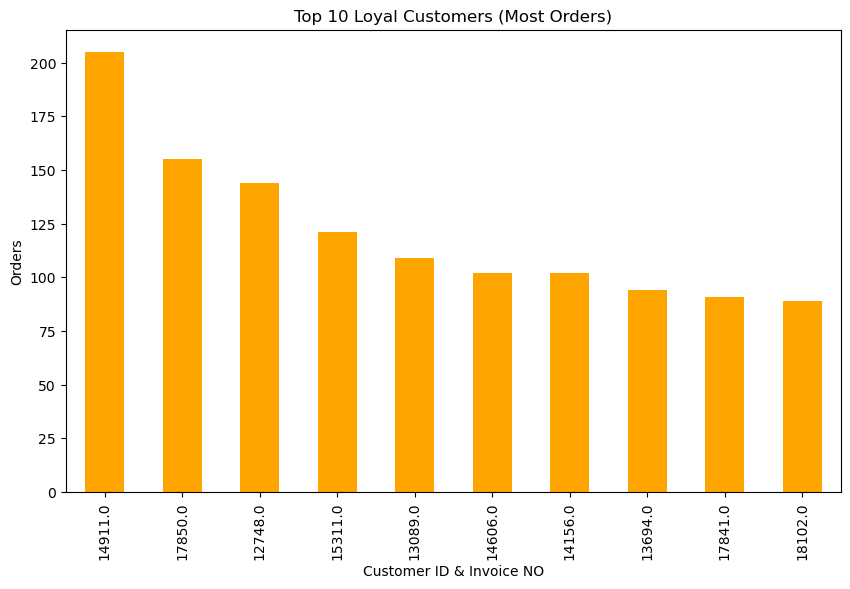

In [104]:
plt.figure(figsize=(10,6))
loyal_customer.plot(kind="bar", color="orange")
plt.title("Top 10 Loyal Customers (Most Orders)")
plt.xlabel("Customer ID & Invoice NO")
plt.ylabel("Orders")
plt.savefig("images/Top_10_Loyal_Customers_(Most Orders).png")
plt.show()

In [105]:
df["Month"] = df["InvoiceDate"].dt.month
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month,YearMonth,Weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12,2009-12,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,2009-12,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,2009-12,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12,2009-12,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,2009-12,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,12,2010-12,Thursday
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010-12,Thursday
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010-12,Thursday
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,12,2010-12,Thursday


In [106]:
#Create Year-Month column
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month,YearMonth,Weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12,2009-12,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,2009-12,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,2009-12,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12,2009-12,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,2009-12,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,12,2010-12,Thursday
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010-12,Thursday
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010-12,Thursday
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,12,2010-12,Thursday


In [107]:
monthly_sales_trend = df.groupby("YearMonth")["Quantity"].sum().reset_index()
monthly_sales_trend

,YearMonth,Quantity
0,2009-12,333263
1,2010-01,260223
2,2010-02,256457
3,2010-03,346389
4,2010-04,311225
5,2010-05,320587
6,2010-06,333319
7,2010-07,295725
8,2010-08,326792
9,2010-09,421117


<Figure size 1000x800 with 0 Axes>

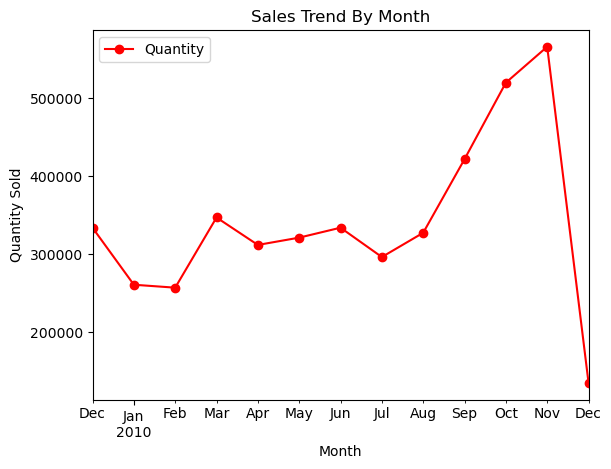

In [108]:
plt.figure(figsize=(10,8))
monthly_sales_trend.plot(x="YearMonth",y="Quantity",color="red",marker="o")
plt.title("Sales Trend By Month")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.savefig("images/Sales_Trend_By_Month.png")
plt.show()

<Figure size 1200x600 with 0 Axes>

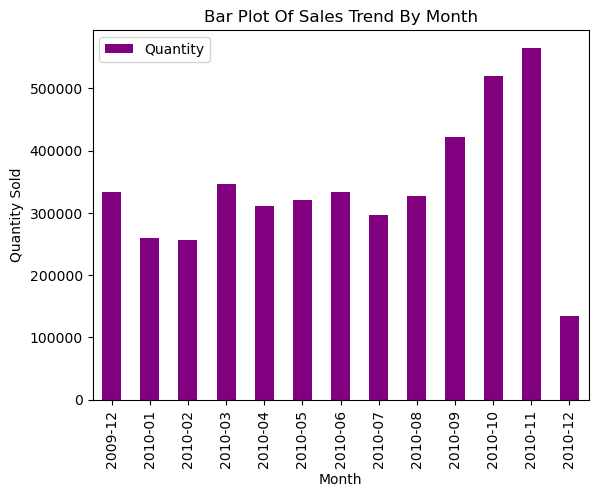

In [109]:
plt.figure(figsize=(12,6))
monthly_sales_trend.plot(kind="bar",x="YearMonth",y="Quantity",color="purple",)
plt.title("Bar Plot Of Sales Trend By Month")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.show()

In [110]:
# Identifing peak sales months and slow seasons

month_sales = df.groupby("Month")["Quantity"].sum()
lowest_sales_month = month_sales.idxmin()
highest_sales_month = month_sales.idxmax()
print(f"Highest amount of sales was recorded in {highest_sales_month} Month" )
print(f"lowest amount of sales was recorded in {lowest_sales_month} Month" )
month_sales

Highest amount of sales was recorded in 11 Month
lowest amount of sales was recorded in 2 Month


Month
1     260223
2     256457
3     346389
4     311225
5     320587
6     333319
7     295725
8     326792
9     421117
10    519174
11    565251
12    467908
Name: Quantity, dtype: int64

In [ ]:
plt.figure(figsize=(12,8))
month_sales.plot(kind="bar")
plt.title("Monthly Sales Trends")
plt.savefig("images/Monthly_Sales_Trends.png")
plt.show()

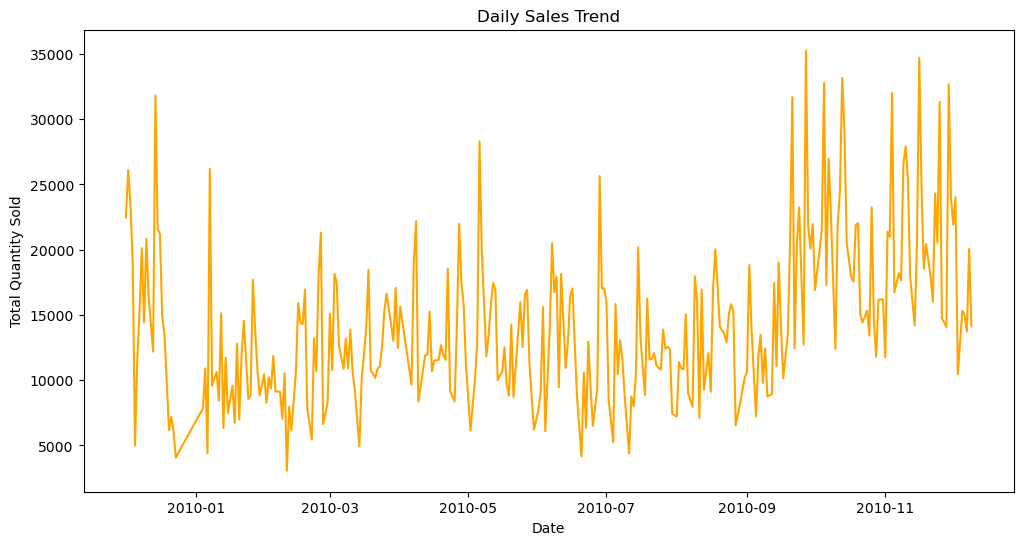

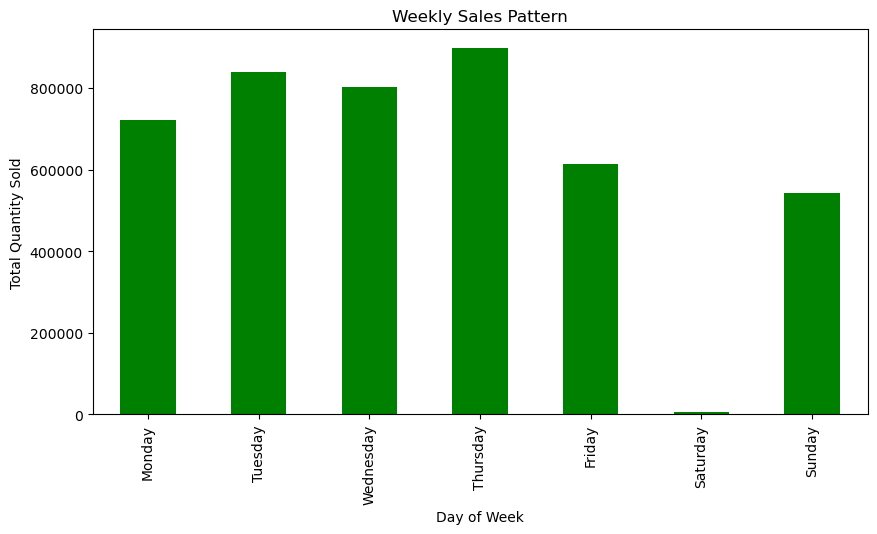

In [111]:
# Daily sales
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Quantity'].sum()

plt.figure(figsize=(12,6))
daily_sales.plot(kind='line', color='orange')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.savefig("images/Daily_Sales_Trend.png")
plt.show()

# Weekly pattern
df['Weekday'] = df['InvoiceDate'].dt.day_name()
weekly_sales = df.groupby('Weekday')['Quantity'].sum().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.figure(figsize=(10,5))
weekly_sales.plot(kind='bar', color='green')
plt.title("Weekly Sales Pattern")
plt.xlabel("Day of Week")
plt.ylabel("Total Quantity Sold")

plt.show()


In [ ]:
df

In [112]:
#checking how many products each country have bought

df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)

Country
United Kingdom          3738033
EIRE                     148071
Netherlands              142027
Germany                  104746
France                    80473
Sweden                    34833
Switzerland               22015
Spain                     18409
Australia                 17125
Denmark                   16728
Belgium                   12059
Portugal                  11988
Channel Islands           11555
Norway                     7867
Italy                      7208
Austria                    6697
Greece                     6167
Japan                      4575
United Arab Emirates       4569
Cyprus                     4450
Finland                    3671
Unspecified                3328
USA                        2662
Lithuania                  2306
Poland                     2144
Thailand                   1832
Singapore                  1753
Malta                      1549
Israel                     1132
Canada                      894
Iceland                     828


In [113]:
# countries with most orders
countries_with_most_orders  = df.groupby("Country")["Invoice"].nunique().sort_values(ascending=False)
countries_with_most_orders = countries_with_most_orders.reset_index().head(10)
countries_with_most_orders

,Country,Invoice
0,United Kingdom,17612
1,Germany,347
2,EIRE,316
3,France,236
4,Netherlands,135
5,Sweden,68
6,Spain,66
7,Belgium,52
8,Switzerland,40
9,Australia,40


<Figure size 1200x600 with 0 Axes>

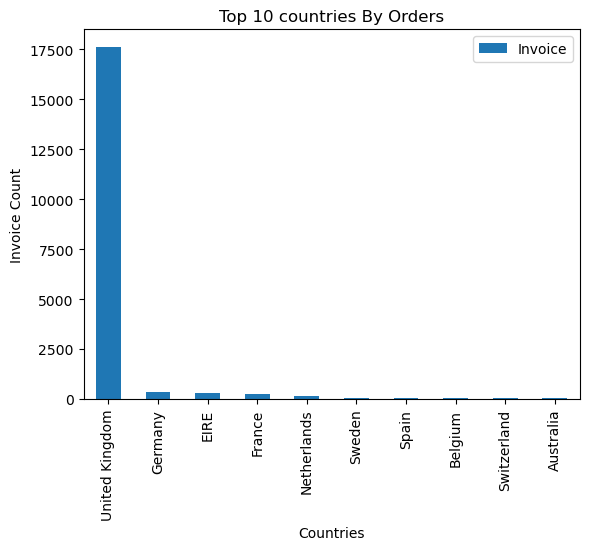

In [114]:
plt.figure(figsize=(12,6))
countries_with_most_orders.plot( kind= "bar",x= "Country" ,y = "Invoice")
plt.title("Top 10 countries By Orders")
plt.xlabel("Countries")
plt.ylabel("Invoice Count")
plt.show()

Observation: United Kingdom have bought the most amount of goods by far

In [115]:
# top 10 countries by revenue
revenue_by_countries  = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10).reset_index()
revenue_by_countries



,Country,Revenue
0,United Kingdom,6693109.283
1,EIRE,297133.150
2,Netherlands,219659.040
3,Germany,194317.131
4,France,126450.520
5,Sweden,41783.060
6,Switzerland,41646.330
7,Spain,36687.130
8,Australia,28010.720
9,Channel Islands,22795.820


<Figure size 1200x600 with 0 Axes>

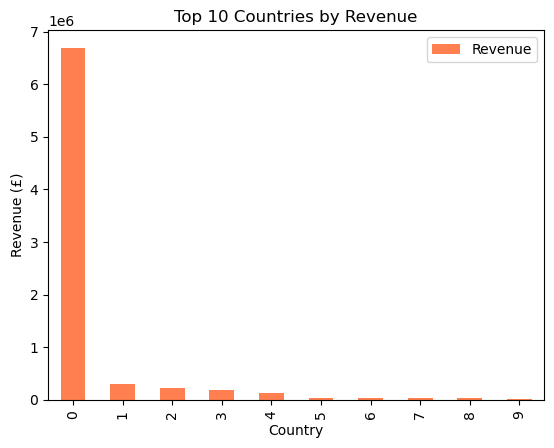

In [116]:


plt.figure(figsize=(12,6))
revenue_by_countries.plot(kind="bar", color="coral")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue (£)")
plt.show()

In [117]:
# creating a recency ,frequency and monetary analysis table 

import datetime as dt

# Define snapshot date (1 day after last purchase in dataset)
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                   # Frequency
    'Revenue': 'sum'                                          # Monetary
}).reset_index()

# Rename columns
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'Invoice': 'Frequency',
                    'Revenue': 'Monetary'}, inplace=True)

# Quartile scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])   # lower recency = better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

# Combine into one score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

rfm

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,12346.0,165,11,372.86,1,4,2,142,7
1,12347.0,3,2,1323.32,4,2,3,423,9
2,12348.0,74,1,222.16,2,1,1,211,4
3,12349.0,43,3,2169.04,3,3,4,334,10
4,12351.0,11,1,300.93,4,1,2,412,7
...,...,...,...,...,...,...,...,...,...
4307,18283.0,18,6,619.37,4,4,2,442,10
4308,18284.0,67,1,426.63,2,2,2,222,6
4309,18285.0,296,1,391.95,1,2,2,122,5
4310,18286.0,112,2,1231.38,2,3,3,233,8


In [118]:
def segment_customer(score):
    if score >= 9:
        return "Champions"
    elif score >= 7:
        return "Loyal Customers"
    elif score >= 5:
        return "Potential Loyalists"
    else:
        return "At Risk / Lost"

rfm['Segment'] = rfm['RFM_Score'].astype(int).apply(segment_customer)

rfm


,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
0,12346.0,165,11,372.86,1,4,2,142,7,Loyal Customers
1,12347.0,3,2,1323.32,4,2,3,423,9,Champions
2,12348.0,74,1,222.16,2,1,1,211,4,At Risk / Lost
3,12349.0,43,3,2169.04,3,3,4,334,10,Champions
4,12351.0,11,1,300.93,4,1,2,412,7,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...
4307,18283.0,18,6,619.37,4,4,2,442,10,Champions
4308,18284.0,67,1,426.63,2,2,2,222,6,Potential Loyalists
4309,18285.0,296,1,391.95,1,2,2,122,5,Potential Loyalists
4310,18286.0,112,2,1231.38,2,3,3,233,8,Loyal Customers


In [119]:
rfm["Segment"].value_counts()

Segment
Champions              1674
Potential Loyalists     955
Loyal Customers         898
At Risk / Lost          785
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15660\1515609755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='viridis')


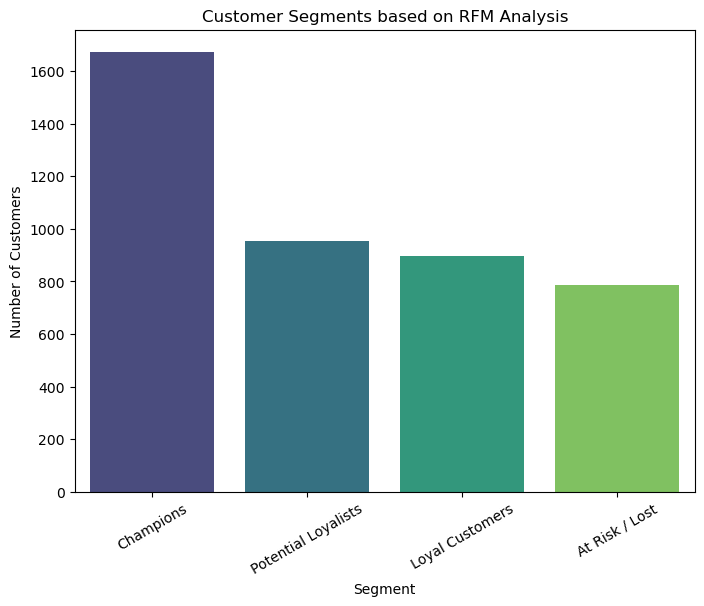

In [120]:

plt.figure(figsize=(8,6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='viridis')
plt.title("Customer Segments based on RFM Analysis")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.xticks(rotation=30)
plt.show()


📌 Conclusion

The analysis of the Online Retail dataset provides valuable insights into customer purchasing behavior and sales patterns:

The business relies heavily on a few key countries, with the United Kingdom generating the majority of orders and revenue.

Top-selling products are mostly low-cost, high-volume items, which drive overall sales volume.

A small segment of loyal customers contributes significantly to revenue, as identified by RFM analysis (high Frequency and Monetary scores).

Seasonal and monthly trends reveal peak activity during the holiday season (especially November and December), which suggests opportunities for targeted marketing and inventory planning.

Outliers (negative or zero prices, canceled invoices) and missing values were addressed to ensure data quality.

Overall, this analysis highlights the importance of customer segmentation, seasonal demand forecasting, and product-level strategies for maximizing sales and customer retention.

In [ ]:
df

In [ ]:
rfm.to_csv("organized_online_retail_II.csv", index=False)
print("File Saved Successfully")

In [ ]:
df["Invoice"].nunique()

In [ ]:
#  Save main dataset + RFM into the same Excel
with pd.ExcelWriter("online_retail_full.xlsx") as writer:
    df.to_excel(writer, sheet_name="MainData", index=False)   # Sheet 1
    rfm.to_excel(writer, sheet_name="RFM", index=True)        # Sheet 2

print("Excel file with 2 sheets saved successfully!")
